<a href="https://www.kaggle.com/code/kartikeybartwal/flood-prediction-using-adadboost?scriptVersionId=180219313" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [18]:
df_train = pd.read_csv("/kaggle/input/playground-series-s4e5/train.csv")

## Exploratory Data Analysis

In [19]:
df_train.shape

(1117957, 22)

In [20]:
df_train.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [21]:
df_train.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

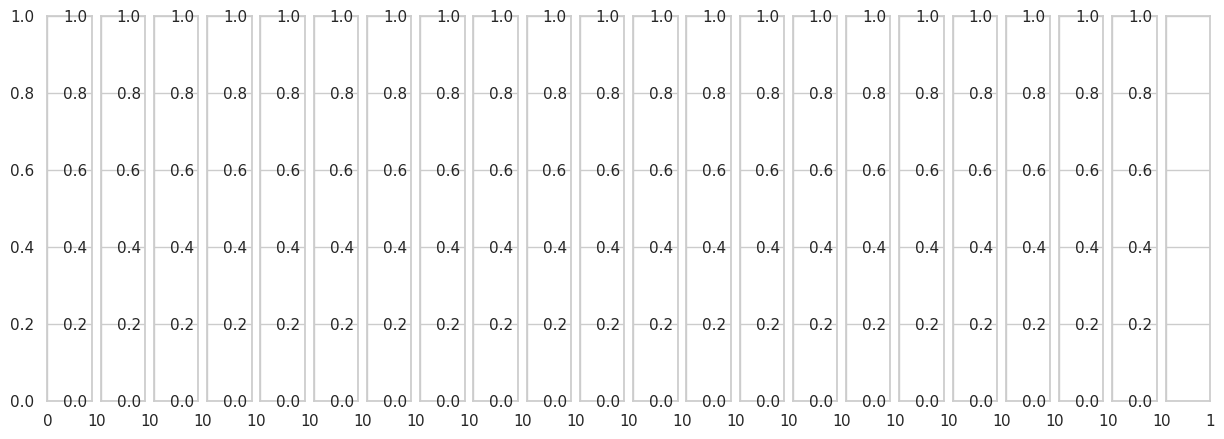

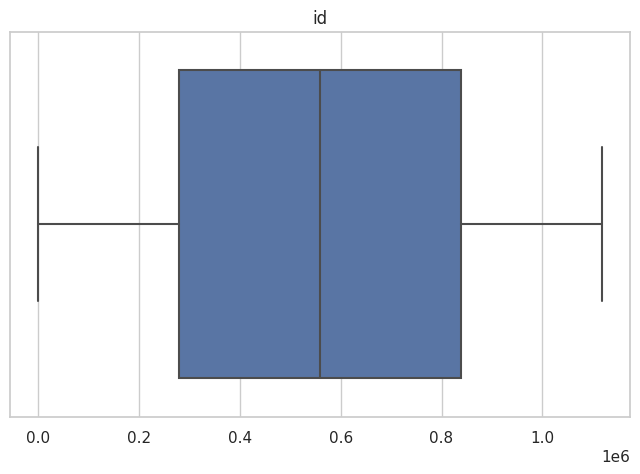

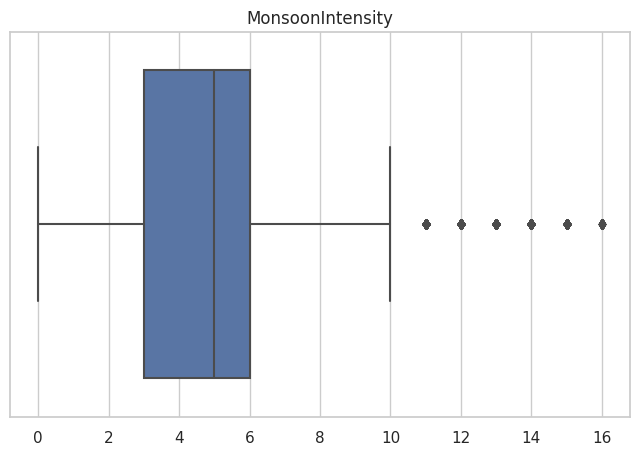

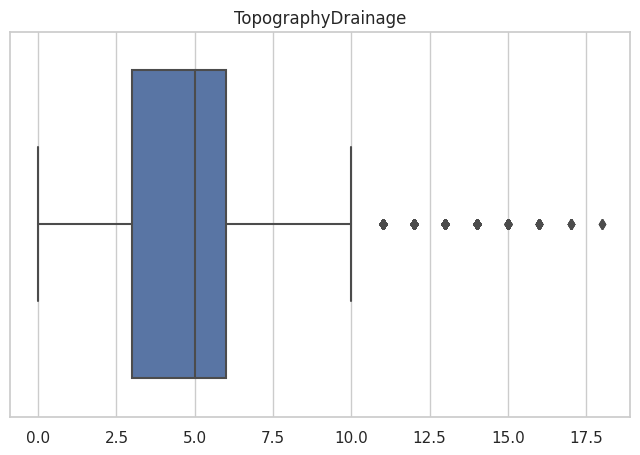

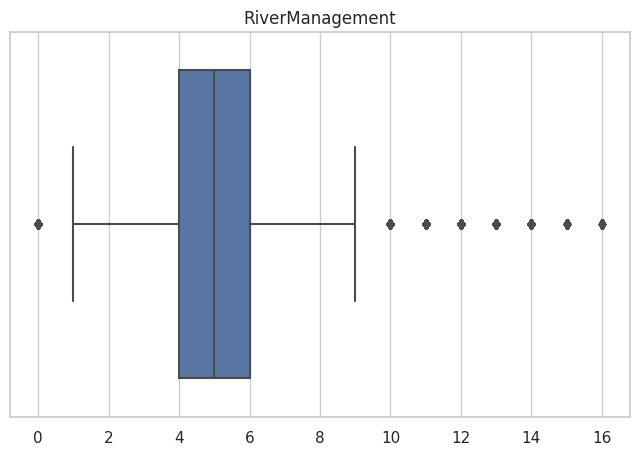

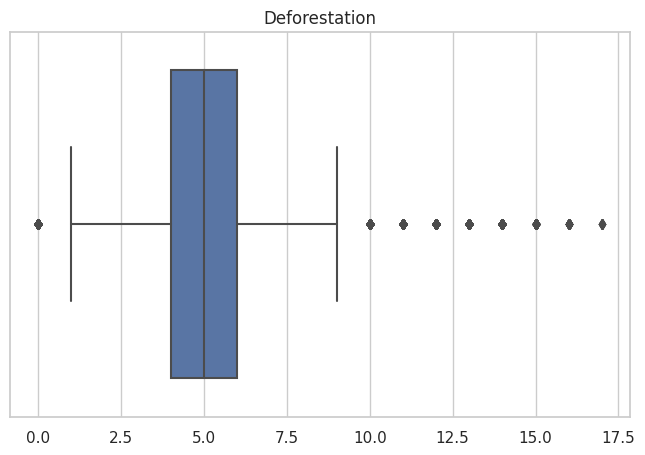

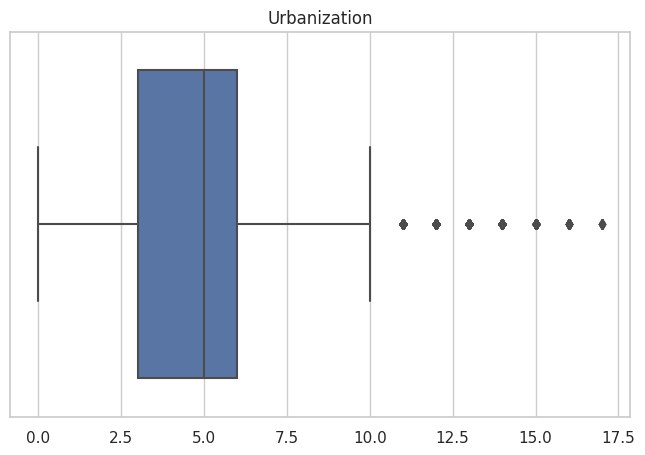

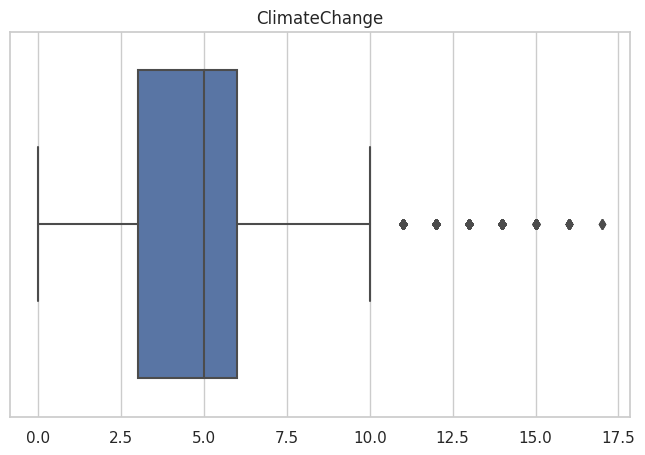

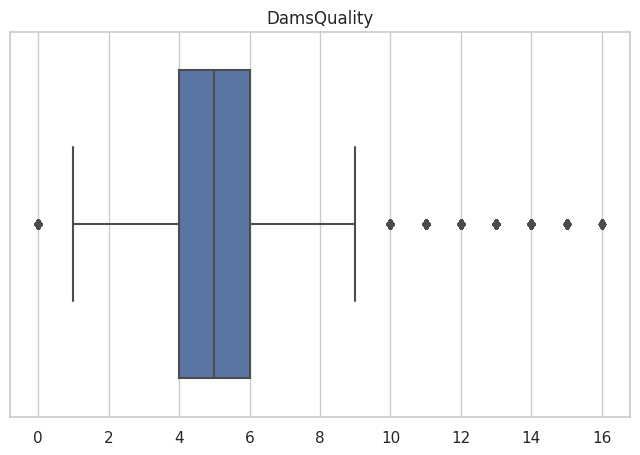

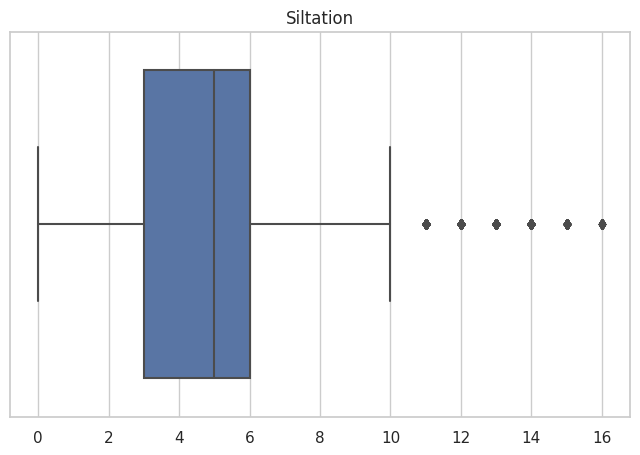

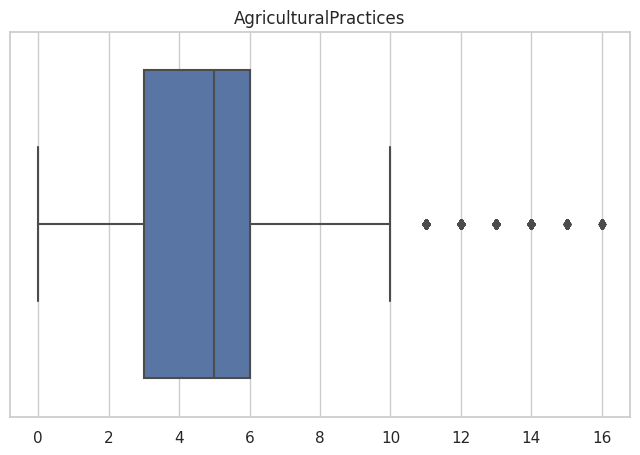

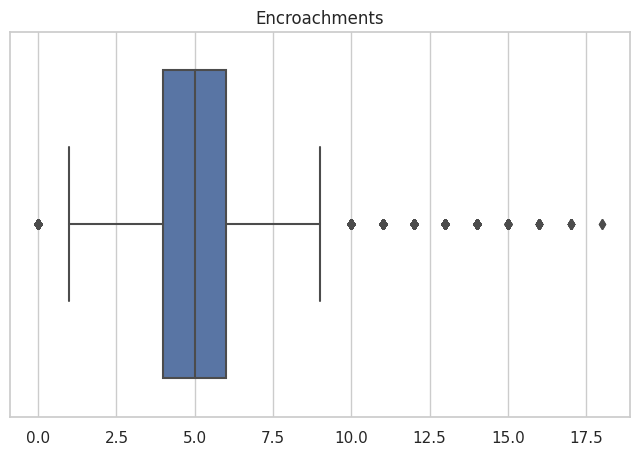

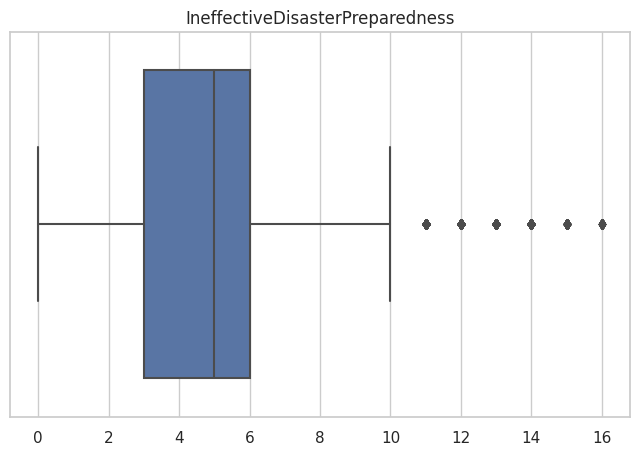

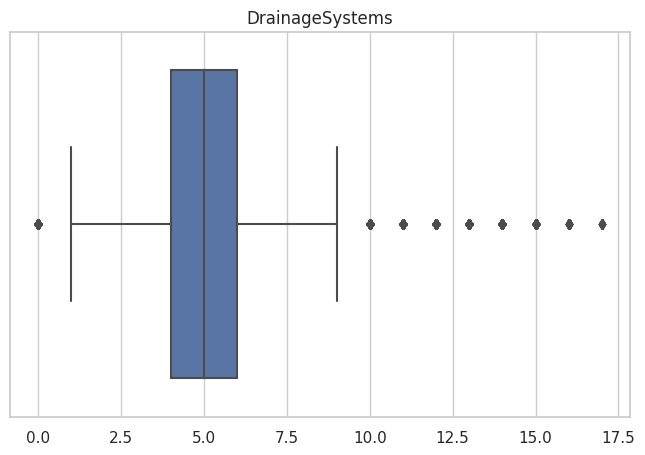

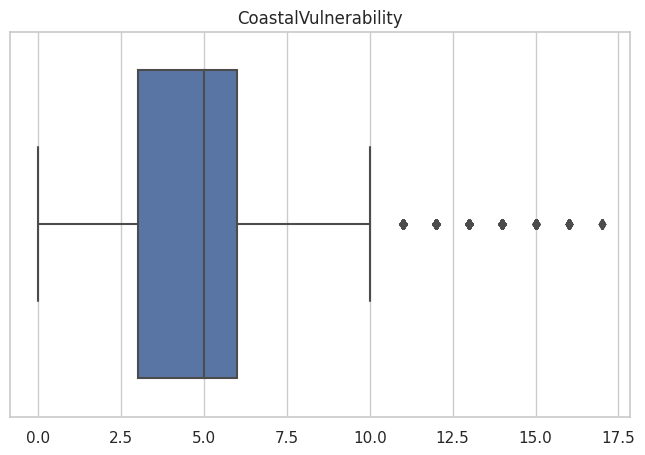

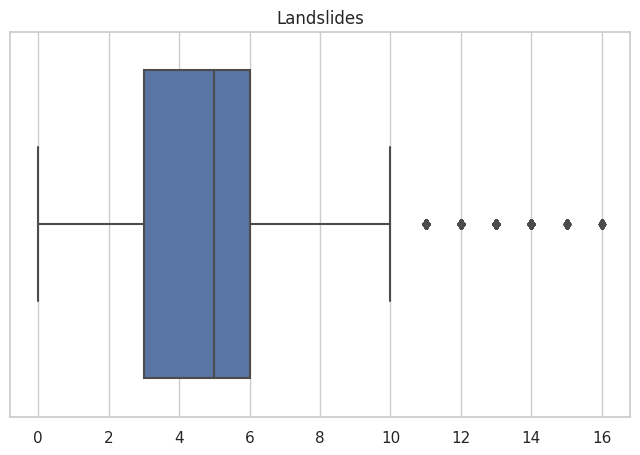

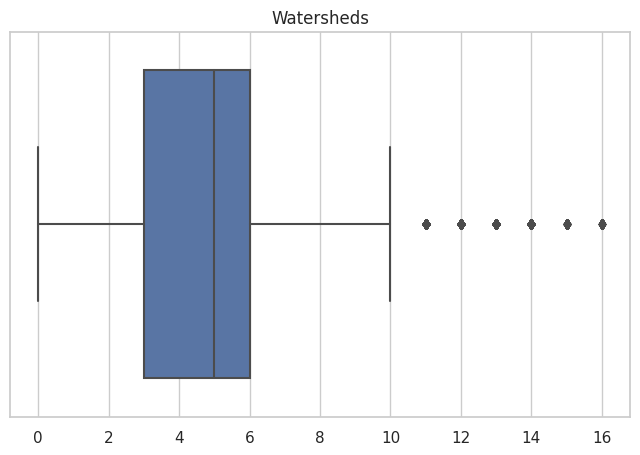

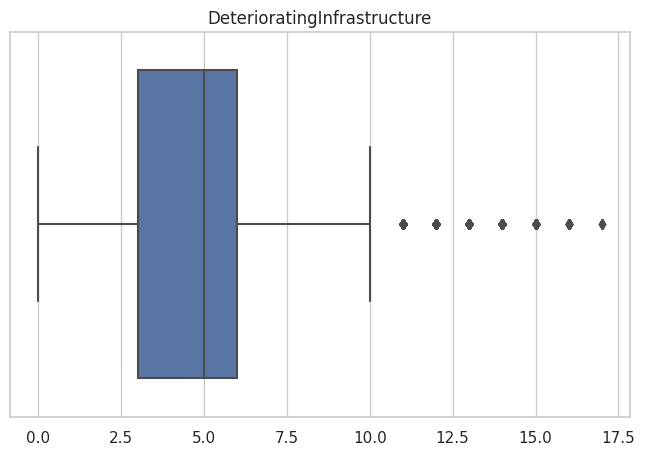

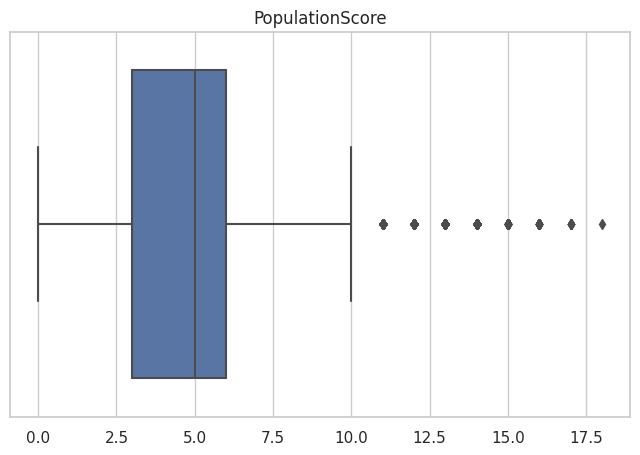

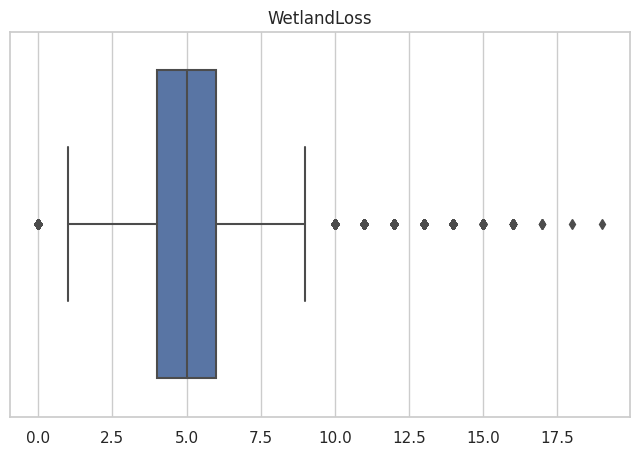

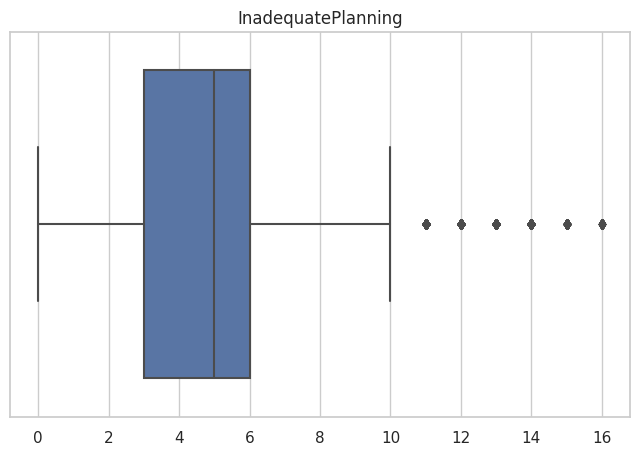

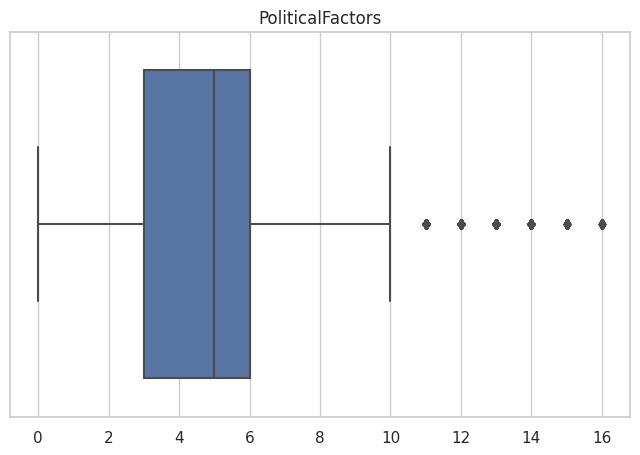

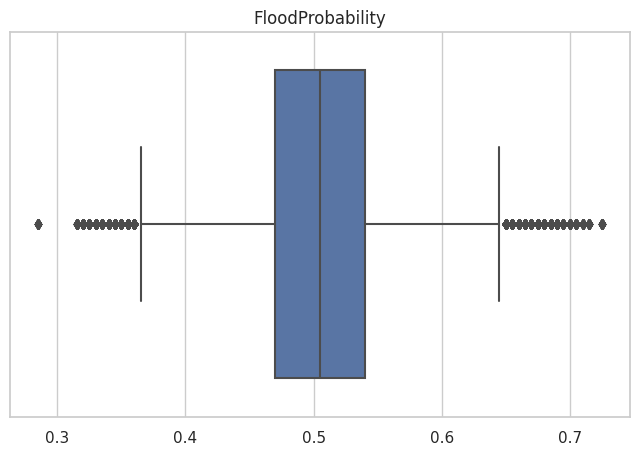

In [12]:
####### BOXPLOT FOR EVERY FEATURE ########

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

num_cols = len(df_train.columns)
fig, axes = plt.subplots(nrows=1, ncols=num_cols, figsize=(15, 5))

for col in df_train.columns:
    plt.figure(figsize=(8, 5))  
    sns.boxplot(x=df_train[col])
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

In [23]:
df_train.shape

(1117957, 22)

In [24]:
def detect_outliers(df, threshold=1.5):
    outlier_columns = []
    
    for col in df.columns:
        # Calculate the first and third quartiles
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        # Interquartile range (IQR)
        iqr = q3 - q1
        
        # Define the lower and upper bounds for outlier detection
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        
        # Find outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        if not outliers.empty:
            outlier_columns.append(col)
    
    return outlier_columns

outlier_cols = detect_outliers(df_train)
print("Columns with outliers: \n", outlier_cols)

Columns with outliers: 
 ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors', 'FloodProbability']


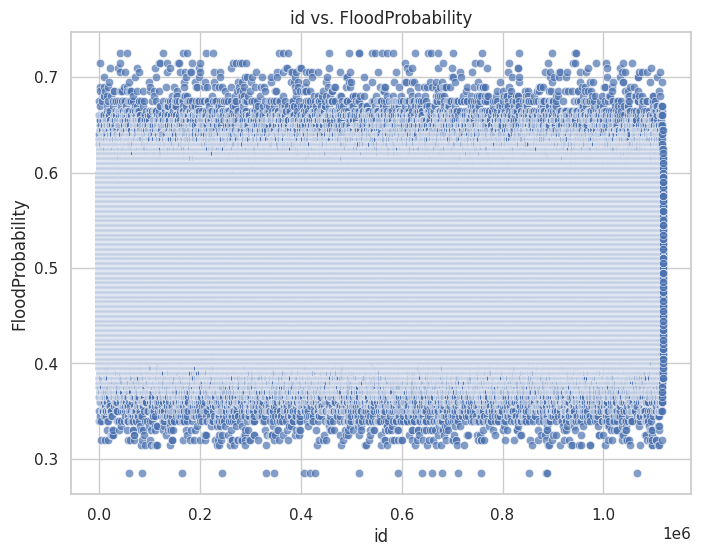

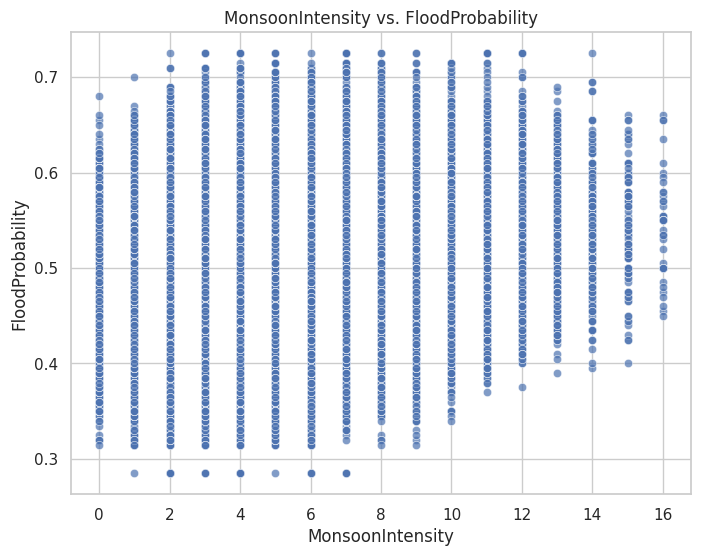

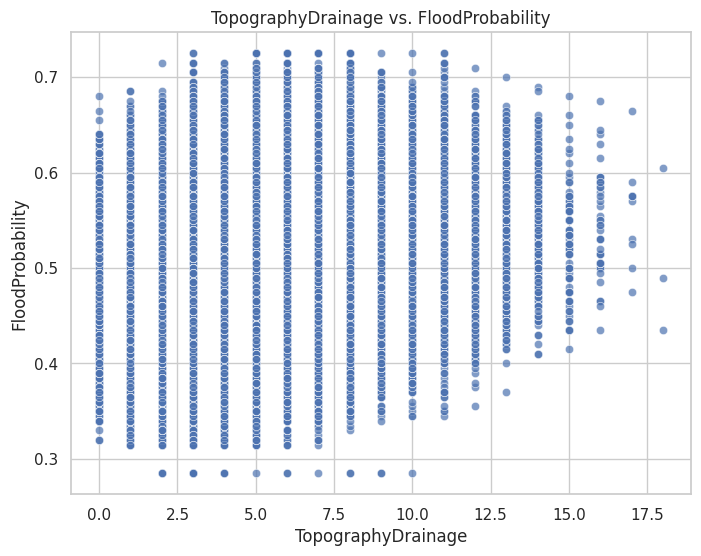

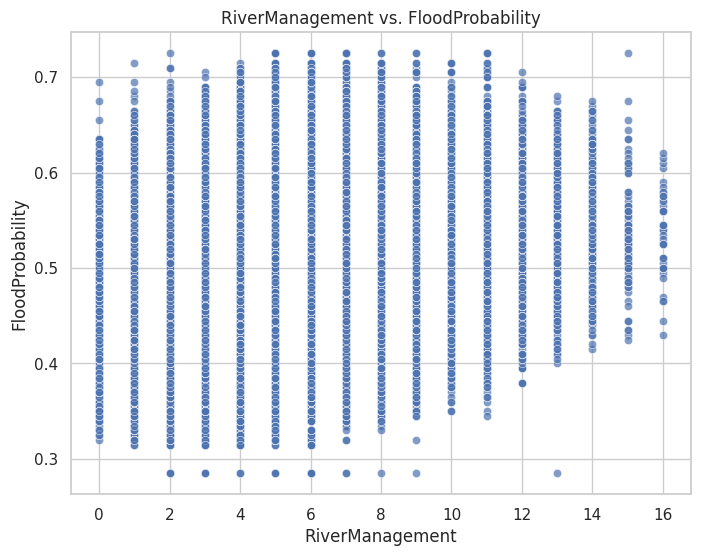

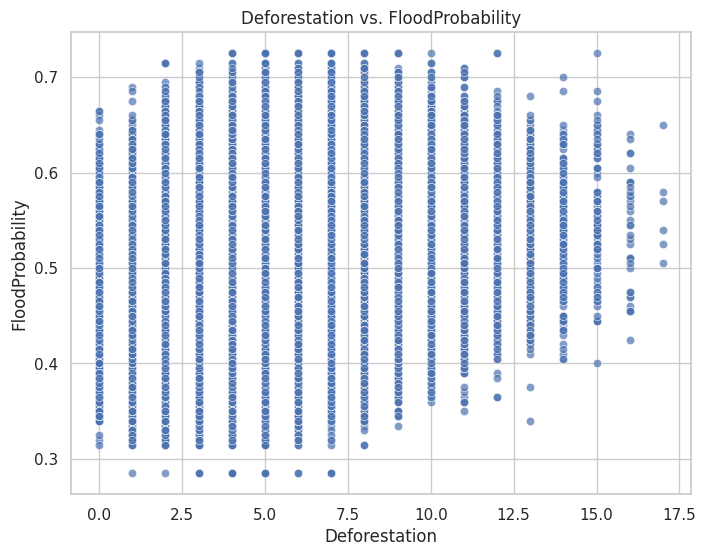

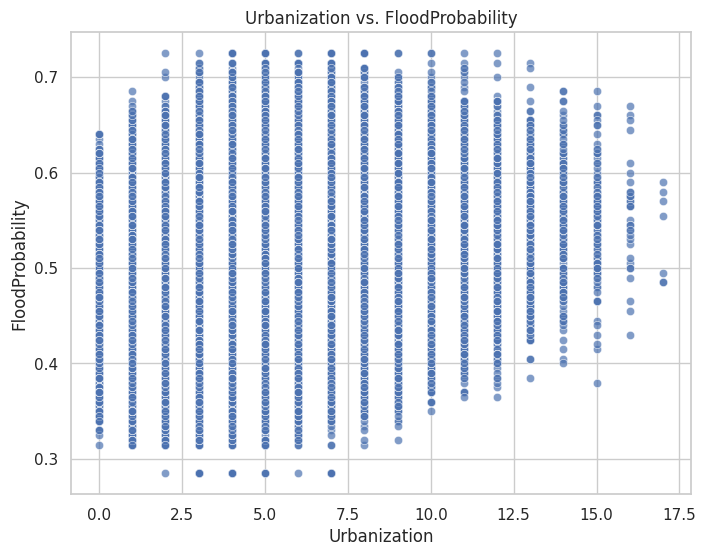

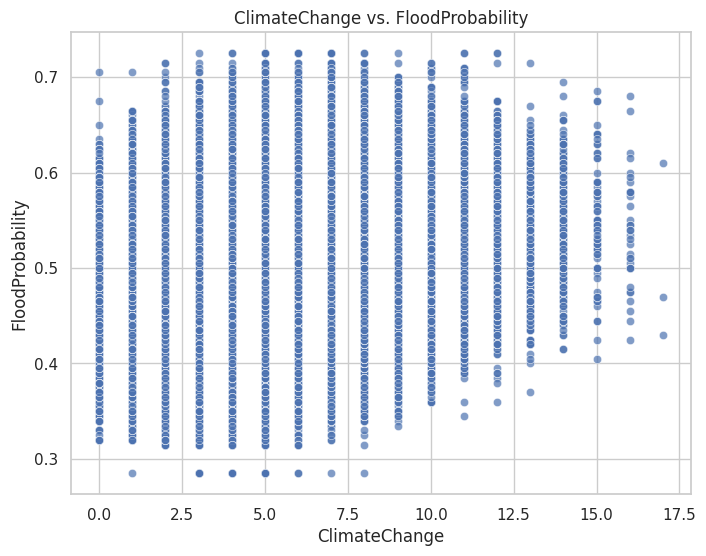

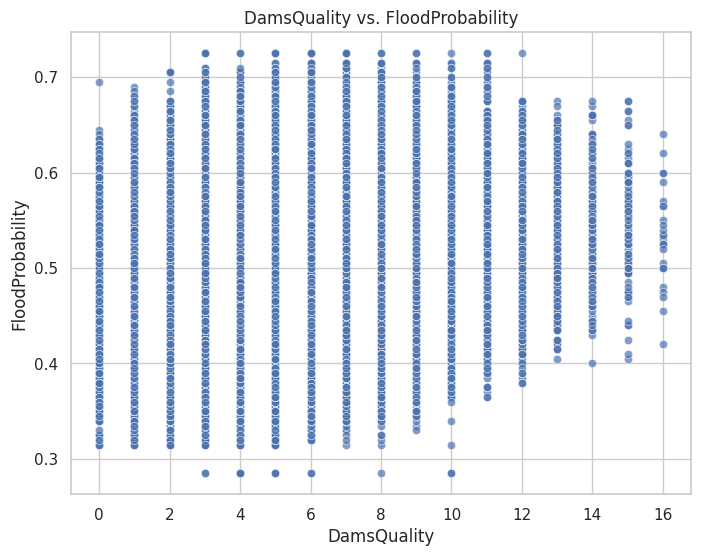

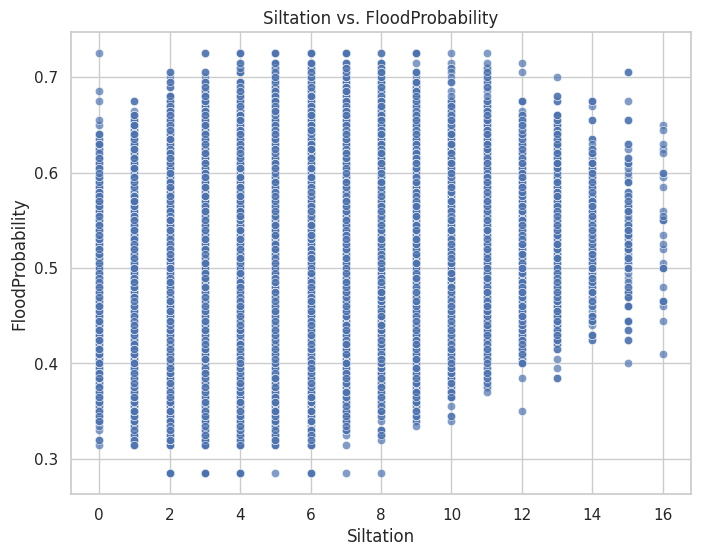

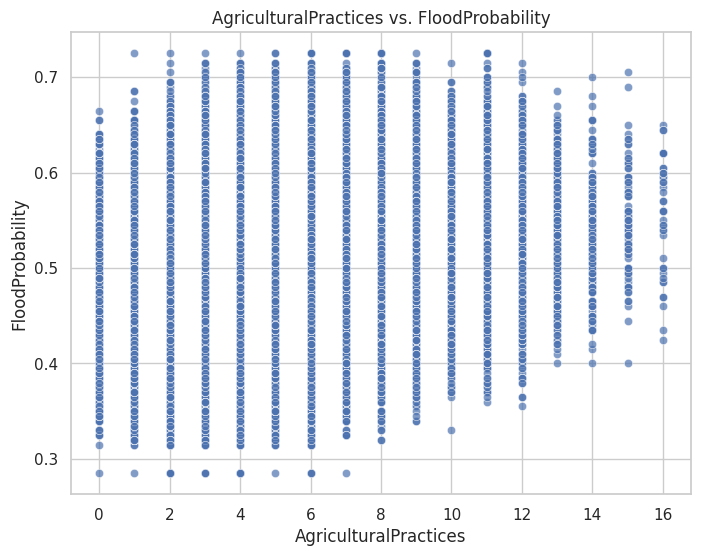

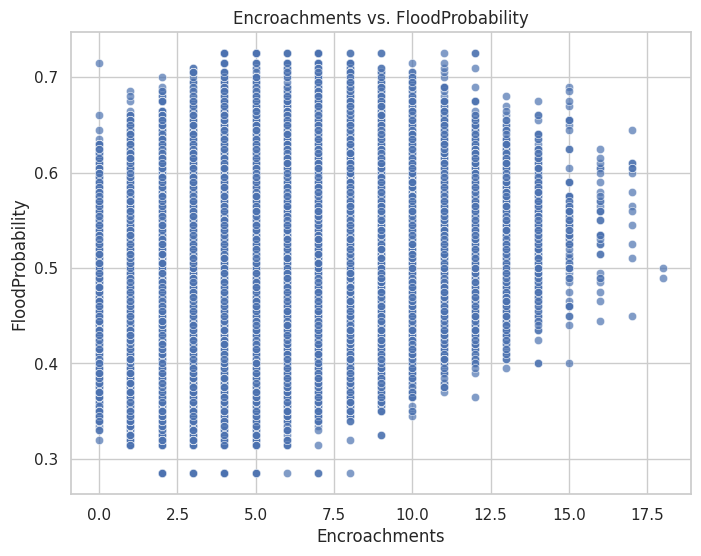

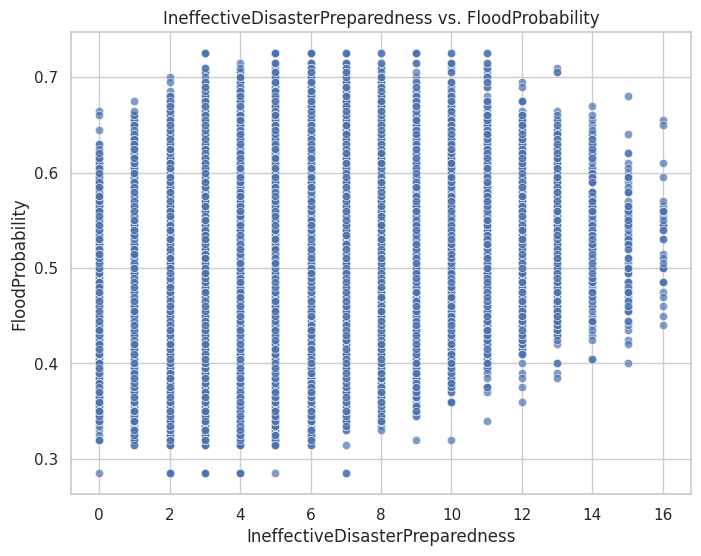

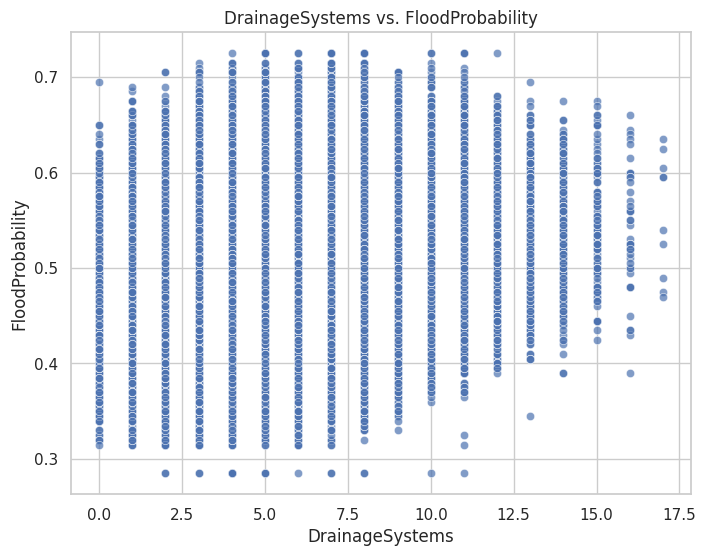

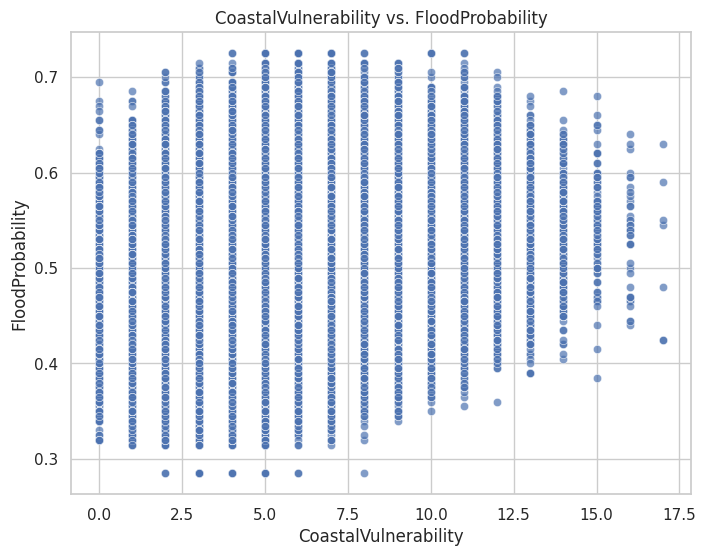

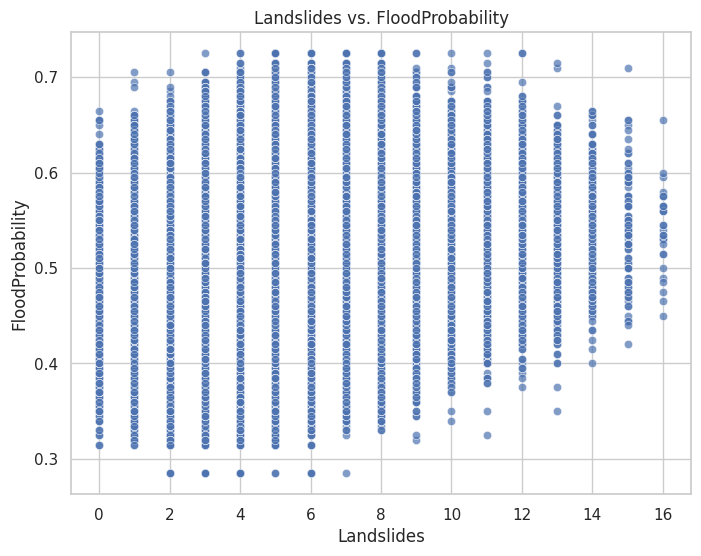

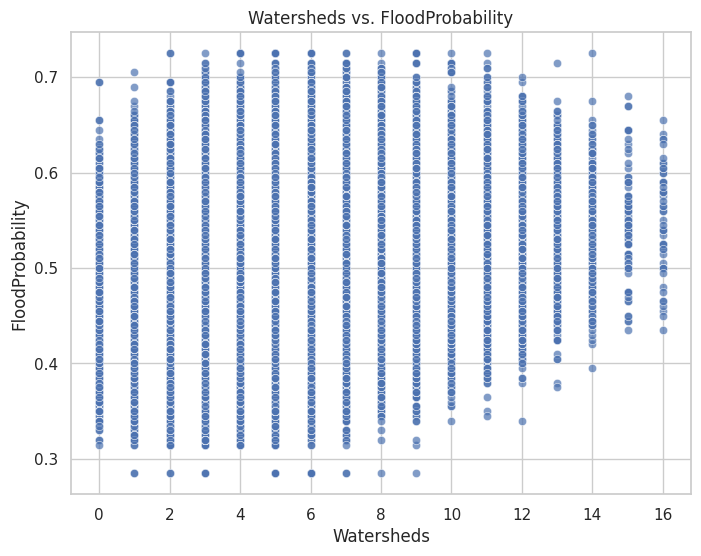

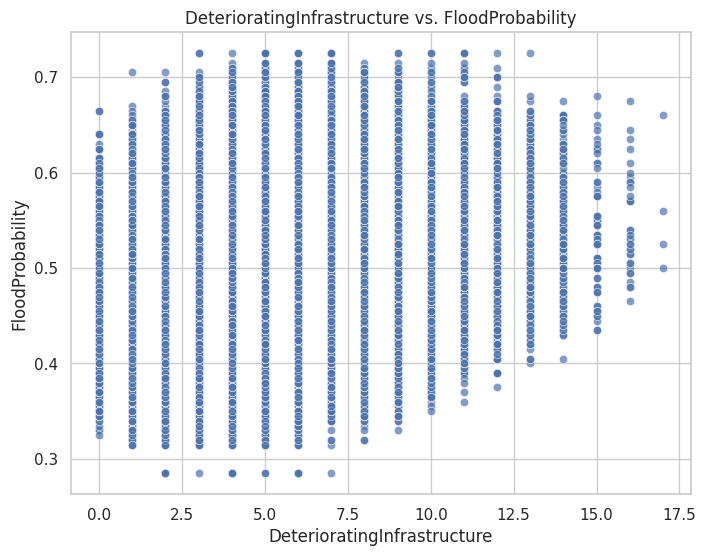

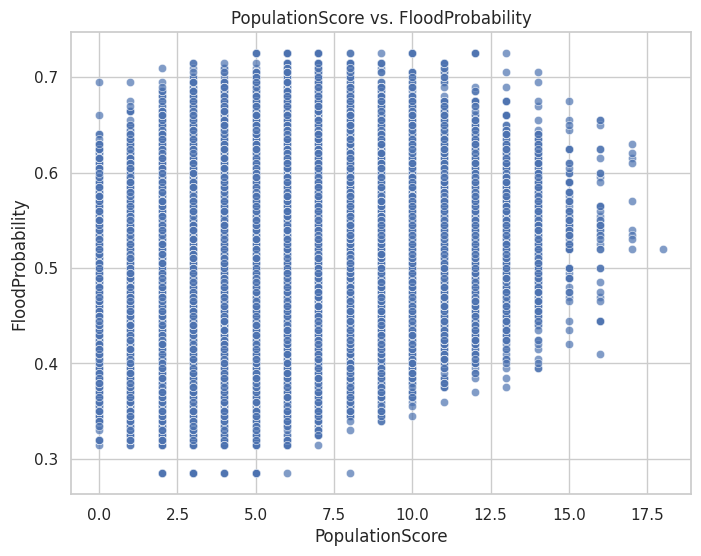

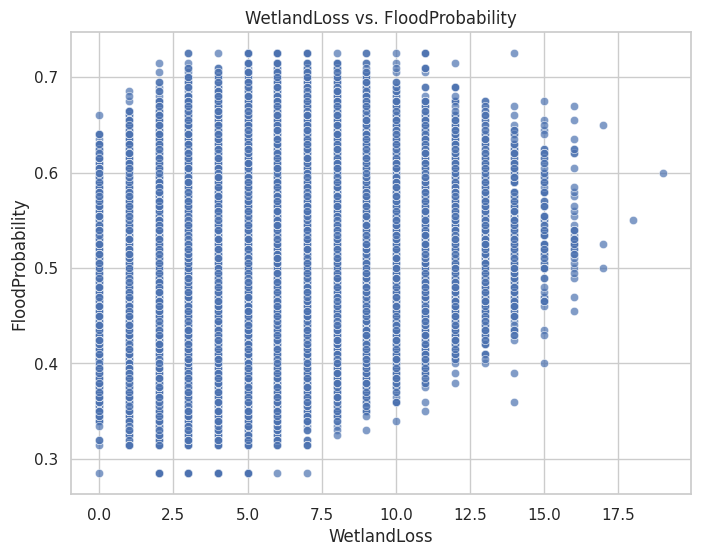

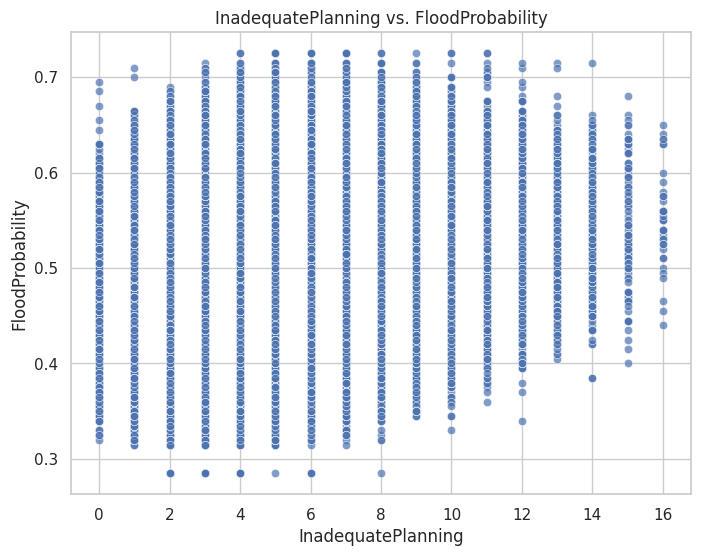

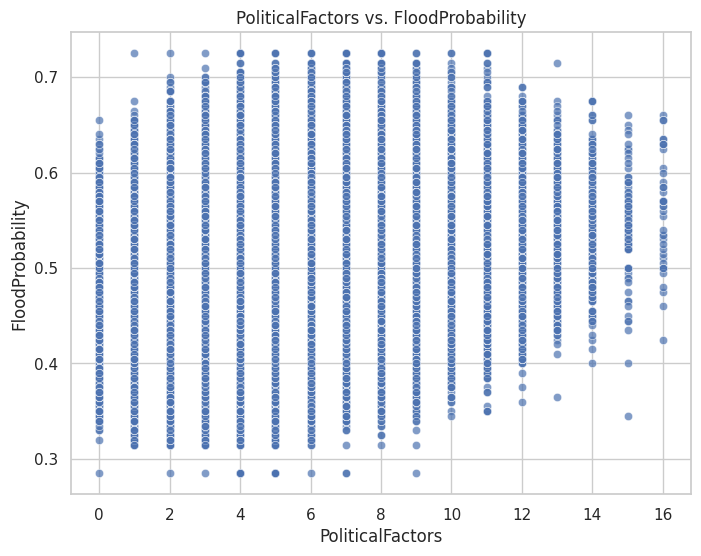

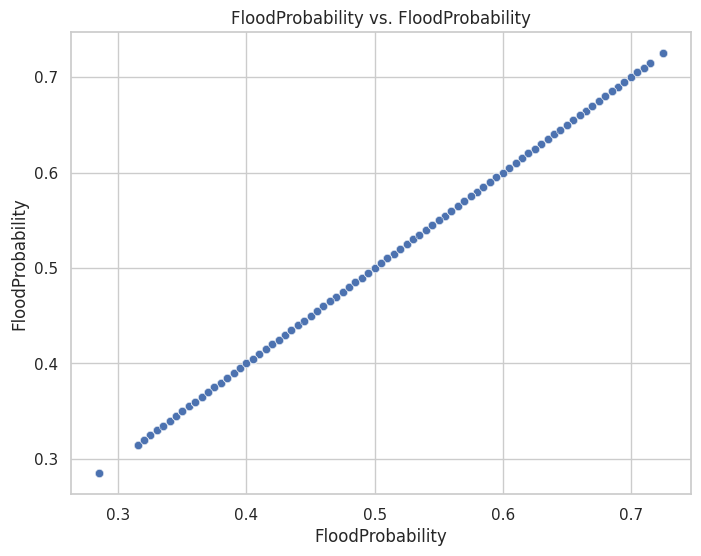

In [15]:
numerical_cols = df_train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Plot numerical columns against 'FloodProbability' using scatter plots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_train, x=col, y='FloodProbability', alpha=0.7)
    plt.title(f'{col} vs. FloodProbability')
    plt.xlabel(col)
    plt.ylabel('FloodProbability')
    plt.grid(True)
    plt.show()

# Plot categorical columns against 'FloodProbability' using bar plots
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=df_train, x=col, y='FloodProbability', alpha=0.7)
    plt.title(f'{col} vs. FloodProbability')
    plt.xlabel(col)
    plt.ylabel('FloodProbability')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

## Feature Engineering

In [25]:
# Drop id
df_train.drop("id" , axis = 1  , inplace = True)

#### Null Values

In [26]:
df_train.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

#### Outliers (Remove Them)

In [27]:
from scipy import stats
def remove_outliers_zscore(df, threshold=3):
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # Calculate Z-score for each numerical column
    z_scores = np.abs(stats.zscore(df[numerical_cols]))
    # Identify rows where any Z-score exceeds the threshold
    outlier_rows = np.any(z_scores > threshold, axis=1)
    # Remove outlier rows from DataFrame
    df_cleaned = df[~outlier_rows]
    
    return df_cleaned

df_train = remove_outliers_zscore(df_train)

In [28]:
df_train.shape

(1050469, 21)

## Feature Scaling

In [29]:
'''No need to perform standardization / normalization as all the features have a small and comparable scale'''

'No need to perform standardization / normalization as all the features have a small and comparable scale'

## Feature Selection

### Pearson Correlation

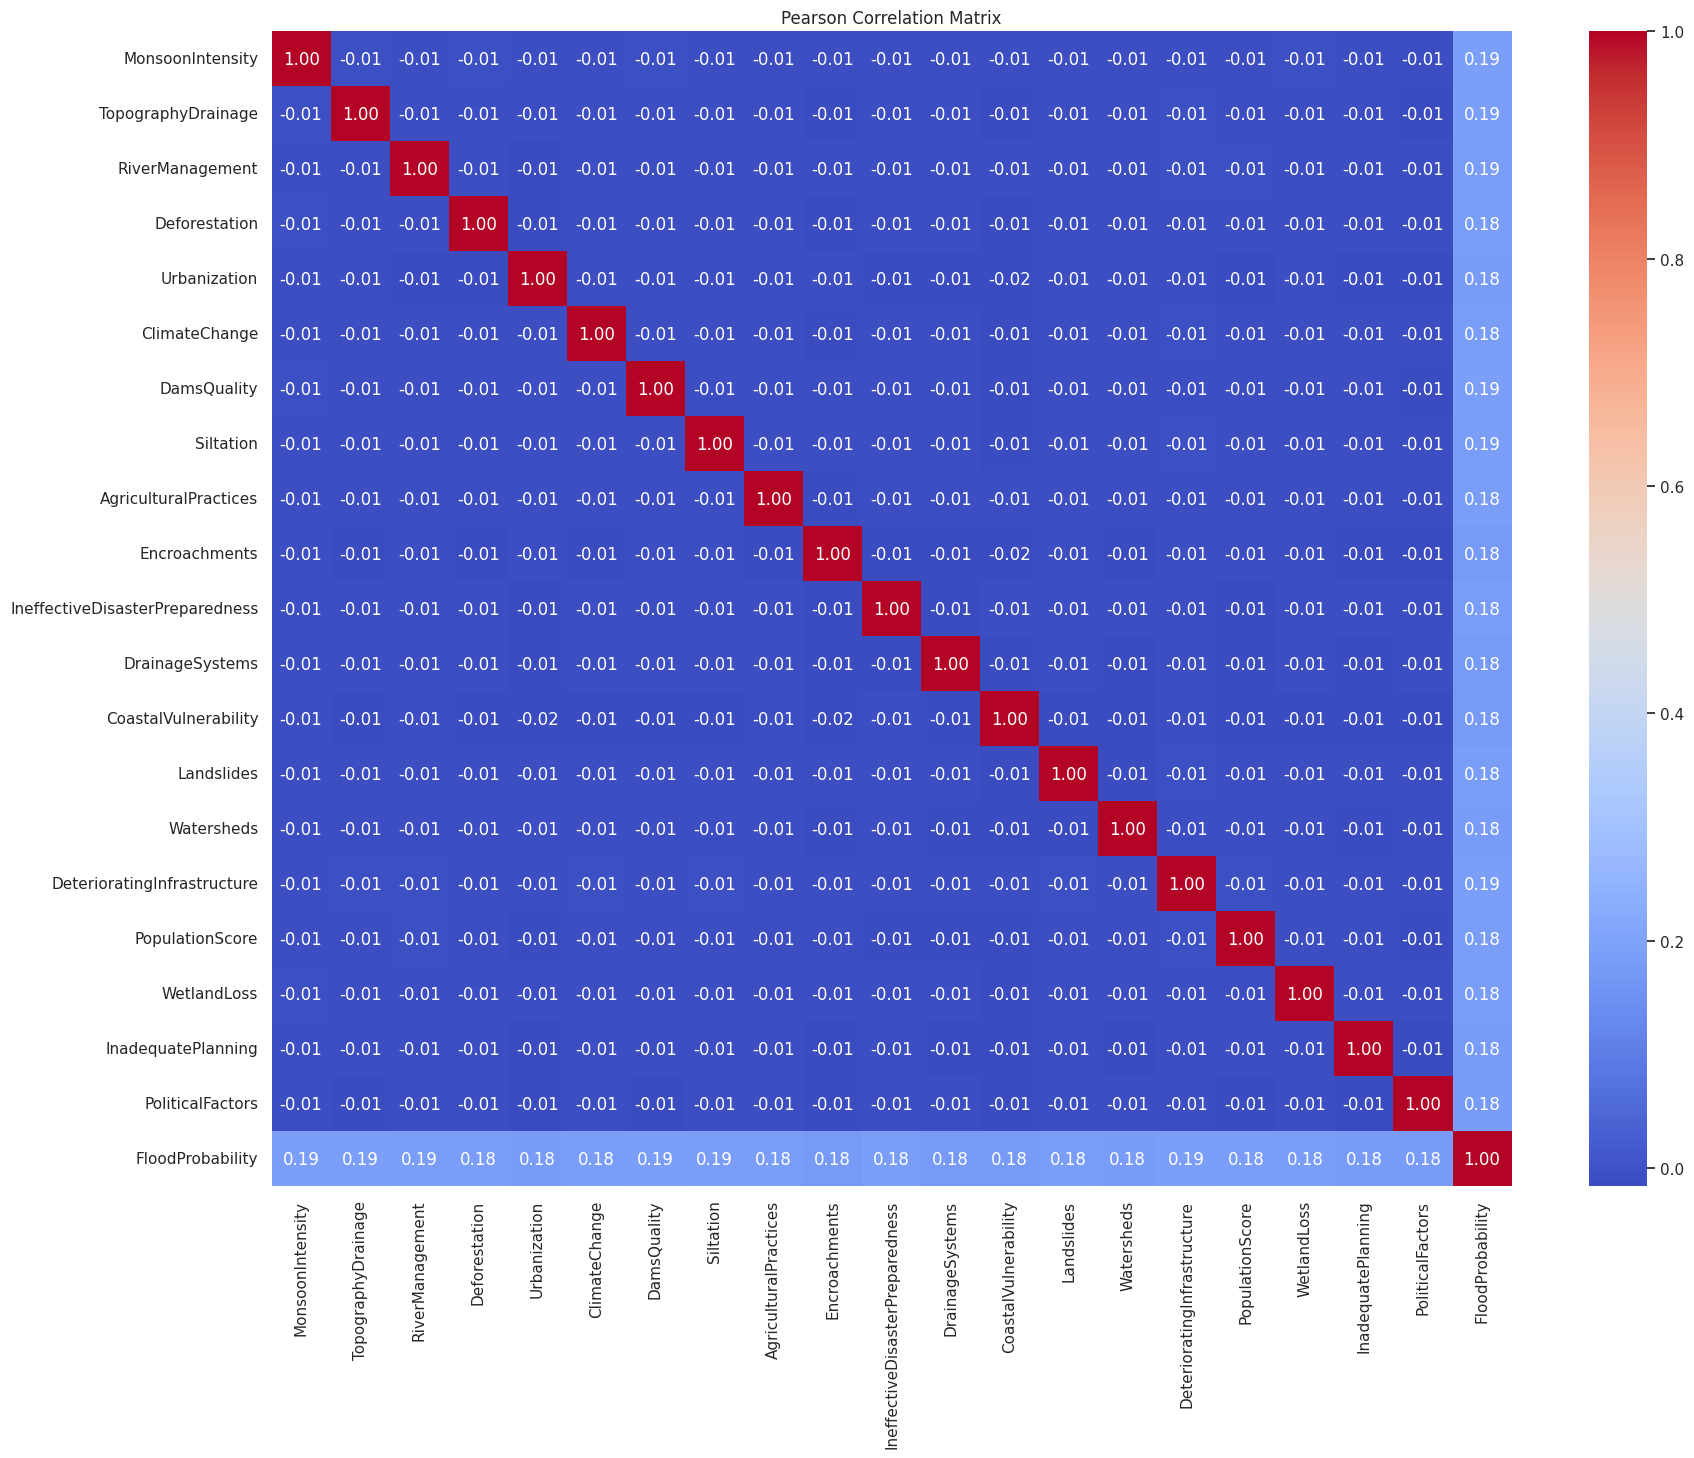

In [21]:
correlation_matrix = df_train.corr(method='pearson')
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()

In [22]:
flood_prob_corr = correlation_matrix['FloodProbability'].drop('FloodProbability')  # Drop 'FloodProbability' itself
# Sort the correlation coefficients in decreasing order of magnitude
sorted_corr = flood_prob_corr.abs().sort_values(ascending=False)
# Print feature names and their corresponding correlation coefficients
for feature in sorted_corr.index:
    print(f"Feature: {feature},     Correlation: {flood_prob_corr[feature]}")

Feature: DeterioratingInfrastructure,     Correlation: 0.18879161921103849
Feature: MonsoonIntensity,     Correlation: 0.18774186016351768
Feature: TopographyDrainage,     Correlation: 0.18688424803362116
Feature: DamsQuality,     Correlation: 0.1866765345850242
Feature: RiverManagement,     Correlation: 0.18596600885456033
Feature: Siltation,     Correlation: 0.18556623391515864
Feature: Landslides,     Correlation: 0.1843530033209877
Feature: PopulationScore,     Correlation: 0.18429306208114674
Feature: ClimateChange,     Correlation: 0.1830086123799134
Feature: Deforestation,     Correlation: 0.18275325661424563
Feature: IneffectiveDisasterPreparedness,     Correlation: 0.18254612257057407
Feature: WetlandLoss,     Correlation: 0.1823344058264508
Feature: AgriculturalPractices,     Correlation: 0.18230278388965074
Feature: PoliticalFactors,     Correlation: 0.18114224363809825
Feature: Watersheds,     Correlation: 0.18108528146064815
Feature: InadequatePlanning,     Correlation: 0.

### Chi-Square Test

In [23]:
from scipy.stats import chi2_contingency

categorical_df = df_train

chi2_results = {}
for col in categorical_df.columns:
    contingency_table = pd.crosstab(df_train[col], df_train['FloodProbability'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    chi2_results[col] = chi2

# Sort the chi-square test results in decreasing order of magnitude
sorted_chi2_results = {k: v for k, v in sorted(chi2_results.items(), key=lambda item: item[1], reverse=True)}

# Print feature names and their corresponding chi-square statistics
for feature, chi2_statistic in sorted_chi2_results.items():
    print(f"Feature: {feature}, Chi-square statistic: {chi2_statistic}")

Feature: FloodProbability, Chi-square statistic: 63028140.0
Feature: DeterioratingInfrastructure, Chi-square statistic: 44925.6069962044
Feature: TopographyDrainage, Chi-square statistic: 44494.37629664089
Feature: MonsoonIntensity, Chi-square statistic: 44391.78109758824
Feature: DamsQuality, Chi-square statistic: 43964.99979105218
Feature: RiverManagement, Chi-square statistic: 43814.650651013115
Feature: Siltation, Chi-square statistic: 43267.763717867245
Feature: Landslides, Chi-square statistic: 42691.437540960374
Feature: IneffectiveDisasterPreparedness, Chi-square statistic: 42454.298251897315
Feature: PopulationScore, Chi-square statistic: 42264.1171143487
Feature: WetlandLoss, Chi-square statistic: 41990.09639812329
Feature: AgriculturalPractices, Chi-square statistic: 41799.44612627293
Feature: ClimateChange, Chi-square statistic: 41738.43636478856
Feature: PoliticalFactors, Chi-square statistic: 41663.54334696955
Feature: InadequatePlanning, Chi-square statistic: 41462.51936

In [24]:
'''Not dropping any feature since they all have practically the same correlation coefficient and Chi-square statistic'''

'Not dropping any feature since they all have practically the same correlation coefficient and Chi-square statistic'

## Model Building

In [30]:
from sklearn.model_selection import train_test_split

x = df_train.drop("FloodProbability" , axis = 1)
y = df_train[['FloodProbability']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)

#### Linear Regression

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

lr_model = LinearRegression()
lr_model.fit(x_train , y_train)


# Make predictions on the training set
y_train_pred = lr_model.predict(x_train)

# Make predictions on the test set
y_test_pred = lr_model.predict(x_test)

# Calculate RMSE, MSE, and MAE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE, MSE, and MAE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training set:")
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("MAE:", mae_train)

print("\nTest set:")
print("RMSE:", rmse_test)
print("MSE:", mse_test)
print("MAE:", mae_test)


Training set:
RMSE: 0.019971393009235065
MSE: 0.00039885653872932315
MAE: 0.015831351469529065

Test set:
RMSE: 0.019907723257545633
MSE: 0.00039631744529902333
MAE: 0.015776164211512816


#### KNN

In [27]:
# from sklearn.neighbors import KNeighborsRegressor

# for k in range(3 , 7):
#     knn_model = KNeighborsRegressor(n_neighbors = k)
#     outputs = cross_val_score(knn_model, x, y,cv=5)
#     print("K:" , k)
#     print("Outputs: ",outputs)

#### Support Vector Machine

In [28]:
# from sklearn.svm import SVR
# from sklearn.model_selection import cross_val_score

# svr_model = SVR()
# outputs = cross_val_score(svr_model, x_train, np.ravel(y_train), cv=10)
# print("Outputs:", outputs)

#### Random Forest Regressor

In [31]:
y_train = np.ravel(y_train)

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor()

rf_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = rf_model.predict(x_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(x_test)

# Calculate RMSE, MSE, and MAE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE, MSE, and MAE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training set:")
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("MAE:", mae_train)

print("\nTest set:")
print("RMSE:", rmse_test)
print("MSE:", mse_test)
print("MAE:", mae_test)


Training set:
RMSE: 0.01105123278524669
MSE: 0.0001221297460737113
MAE: 0.008980396743464833

Test set:
RMSE: 0.0293217510628262
MSE: 0.0008597650853903493
MAE: 0.02409581235066209


## XGBoost

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor()

# Train the XGBoost model on the training data
xgb_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_model.predict(x_train)

# Make predictions on the test set
y_test_pred = xgb_model.predict(x_test)

# Calculate RMSE, MSE, and MAE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE, MSE, and MAE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training set:")
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("MAE:", mae_train)

print("\nTest set:")
print("RMSE:", rmse_test)
print("MSE:", mse_test)
print("MAE:", mae_test)

Training set:
RMSE: 0.021520192566634476
MSE: 0.0004631186881050298
MAE: 0.01703270263549149

Test set:
RMSE: 0.021927296728561786
MSE: 0.00048080634182239636
MAE: 0.017374363702582784


#### Gradient Boosting Machines (GBM)

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the Gradient Boosting Regressor model
gbm_model = GradientBoostingRegressor()

# Train the Gradient Boosting Regressor model on the training data
gbm_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = gbm_model.predict(x_train)

# Make predictions on the test set
y_test_pred = gbm_model.predict(x_test)

# Calculate RMSE, MSE, and MAE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE, MSE, and MAE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training set:")
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("MAE:", mae_train)

print("\nTest set:")
print("RMSE:", rmse_test)
print("MSE:", mse_test)
print("MAE:", mae_test)


Training set:
RMSE: 0.03094426913591604
MSE: 0.0009575477923560059
MAE: 0.025615165740470423

Test set:
RMSE: 0.030968829252474652
MSE: 0.0009590683852689297
MAE: 0.02562048637343353


#### AdaBoost (Adaptive Boosting)

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.model_selection import cross_val_score

# adaboost_model = AdaBoostRegressor()
# outputs = cross_val_score(adaboost_model, x, np.ravel(y), cv=10, scoring='neg_mean_squared_error')

# # Convert outputs to positive values
# outputs = -outputs

# print("Outputs:", outputs)

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Initialize the AdaBoost Regressor model
ada_model = AdaBoostRegressor()

# Train the AdaBoost Regressor model on the training data
ada_model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = ada_model.predict(x_train)

# Make predictions on the test set
y_test_pred = ada_model.predict(x_test)

# Calculate RMSE, MSE, and MAE for training set
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate RMSE, MSE, and MAE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the results
print("Training set:")
print("RMSE:", rmse_train)
print("MSE:", mse_train)
print("MAE:", mae_train)

print("\nTest set:")
print("RMSE:", rmse_test)
print("MSE:", mse_test)
print("MAE:", mae_test)

Training set:
RMSE: 0.03431494467506402
MSE: 0.0011775154280527045
MAE: 0.028221589240727814

Test set:
RMSE: 0.034322555724517194
MSE: 0.001178037831462588
MAE: 0.028163488565803627


### Choosing the Best Performing Model to Make the Predictions

In [76]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e5/test.csv")

In [77]:
df_test

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,1117957,4,6,3,5,6,7,8,7,8,...,8,5,7,5,6,3,6,4,4,5
1,1117958,4,4,2,9,5,5,4,7,5,...,2,4,7,4,5,1,7,4,4,3
2,1117959,1,3,6,5,7,2,4,6,4,...,7,9,2,5,5,2,3,6,8,3
3,1117960,2,4,4,6,4,5,4,3,4,...,7,8,4,6,7,6,4,2,4,4
4,1117961,6,3,2,4,6,4,5,5,3,...,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745300,1863257,5,4,8,3,5,4,4,5,5,...,5,6,1,3,5,6,4,4,6,6
745301,1863258,4,4,2,12,4,3,4,3,5,...,3,7,4,4,3,5,5,3,5,4
745302,1863259,5,7,9,5,5,6,7,5,5,...,6,11,3,11,4,5,9,5,5,4
745303,1863260,4,7,6,3,5,2,3,8,6,...,6,6,8,6,2,3,8,7,5,5


In [78]:
df_test_nanid = df_test.drop("id" , axis = 1)

In [79]:
x_target = df_test_nanid

In [80]:
x_target.shape

(745305, 20)

In [82]:
outputs = ada_model.predict(x_target)
output_df = pd.DataFrame(outputs , columns =  ["FloodProbability"])

In [83]:
output_df

,FloodProbability
0,0.530133
1,0.489228
2,0.496551
3,0.480515
4,0.489472
...,...
745300,0.486164
745301,0.448761
745302,0.537293
745303,0.515885


In [84]:
id = df_test[["id"]]

In [85]:
id

,id
0,1117957
1,1117958
2,1117959
3,1117960
4,1117961
...,...
745300,1863257
745301,1863258
745302,1863259
745303,1863260


In [86]:
output_df = pd.concat([id, output_df], axis=1)
# output_df.name = 'FloodProbability'

In [87]:
output_df

,id,FloodProbability
0,1117957,0.530133
1,1117958,0.489228
2,1117959,0.496551
3,1117960,0.480515
4,1117961,0.489472
...,...,...
745300,1863257,0.486164
745301,1863258,0.448761
745302,1863259,0.537293
745303,1863260,0.515885


In [88]:
output_df.to_csv("target outputs.csv")